### Elastic net Regression
1. Ridge---add penalty(lambda)--->complex---->model performance will be low(doesn't make slopes to zero)
2. Lasso----removes unwanted features----->loss of information
- Elastic Net
    - combination of lasso and ridge
    - costfunction+(lamda(slope)^2)+(lambda|slope|)
    - works well if we have big dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["Target"]=boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [3]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [4]:
x=boston_df[boston_df.columns[:-1]]
y=boston_df["Target"]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)
x_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [5]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,train_size=0.7,random_state=42)
model=ElasticNet(alpha=1)
model.fit(x_train,y_train)

ElasticNet(alpha=1)

In [6]:
y_pred=model.predict(x_test)

In [7]:
model.score(x_train,y_train)

0.6595827009564947

In [8]:
model.score(x_test,y_test)

0.6330719847370372

In [9]:
model.coef_

array([-0.43123542,  0.        , -0.17967342,  0.59876755, -0.20584545,
        2.39148464, -0.        , -0.        , -0.        , -0.25930078,
       -1.24929932,  0.53074402, -2.50983769])

In [11]:
##Try to load the insurance ann predict using regression algorithms
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Data-Science-Using-Python-Internship-EB1/main/Notebooks/Day_35(Elastic%20Net)/insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

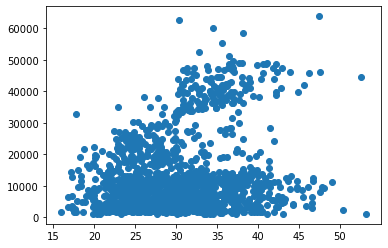

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df["bmi"],df["charges"])

In [14]:
df.replace('female',0,inplace=True)
df.replace('male',1,inplace=True)

In [15]:
df.replace('yes',0,inplace=True)
df.replace('no',1,inplace=True)

In [16]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df.replace('southwest',0,inplace=True)
df.replace('southeast',1,inplace=True)
df.replace('northwest',2,inplace=True)
df.replace('northeast',3,inplace=True)

In [18]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       2  21984.47061
4   32    1  28.880         0       1       2   3866.85520

In [19]:
x=df.iloc[:,:6]
y=df["charges"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=25)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_train,y_train)

0.7568932401931163

In [22]:
model.score(x_test,y_test)

0.7329421114886109

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# poly=PolynomialFeatures(degree=3)
# x_poly=poly.fit_transform(x)
from sklearn.metrics import r2_score
acc=[]
for i in range(2,20):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [ ]:
print(acc)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=8)
x_poly=poly.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)
y_pred=model.predict(x_poly)

In [ ]:
r2_score(y,y_pred)*100